### Image classification test based on basic neural network

pp. 58

1. Read the data: Transform the data into tensors, the input shape for the network.
2. Define the network (using Multi Layer Perceptron)
3. Define loss function
4. Define optimization
5. Train the network
6. Make a prediction

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 1. READ THE DATA: Download the dataset "CIFAR-10"

train_dataset = torchvision.datasets.CIFAR10(root='../CIFAR10', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='../CIFAR10', train=False, transform=transforms.ToTensor(), download=True)

image, label = train_dataset[0]
print(image.size())
print(label)

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [4]:
# (Optional) Check the size of the loaded dataset 

for images, labels in train_loader:
    print(images.size()) # loaded tensors
    print(images[0].size()) # first batch
    print(labels.size())
    break

torch.Size([64, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([64])


In [34]:
# 2. DEFINE THE NETWORK: based on MLP

num_classes = 10
class MLPNet (nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 600) # fully connected layer 1
        self.fc2 = nn.Linear(600, 600)     # fully connected layer 2
        self.fc3 = nn.Linear(600, num_classes) # fully connected layer 3
        self.dropout1 = nn.Dropout2d(0.2) # droptout layer 1
        self.dropout2 = nn.Dropout2d(0.2) # dropout layer 2
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return F.relu(self.fc3(x))
    
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MLPNet().to(device)

In [35]:
# 3 & 4. DEFINE LOSS FUNCTION AND OPTIMIZATION

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [36]:
# 5. TRAIN THE NETWORK

num_epochs = 50

train_loss_list = [] # make an empty list for later use
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0 # set initial values for all the epoch
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    ##### train #####
    net.train()  # transform into training mode 
    # read by mini batch
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.view(-1, 32*32*3).to(device), labels.to(device) # transform into 1D and transfer to GPU
        optimizer.zero_grad() # initialize the gradient
        outputs = net(images) # feedforward calculation
        loss = criterion(outputs, labels)
        train_loss +=loss.item()
        train_acc += (outputs.max(1)[1]==labels).sum().item()
        loss.backward() # backpropagation calculation
        optimizer.step() 
        
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)
    
    ##### evaluation #####
    net.eval() # switch to evaluation mode
    with torch.no_grad(): # gradient calculation is not required for the evaluation
        for images, labels in test_loader:
            images, labels = images.view(-1, 32*32*3).to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1] == labels).sum().item()
        avg_val_loss = val_loss / len(test_loader.dataset)
        avg_val_acc = val_acc / len(test_loader.dataset)
            
        print("Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}".format
                  (epoch+1, num_epochs, i+1, loss = avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
            
        train_loss_list.append(avg_train_loss)
        train_acc_list.append(avg_train_acc)
        val_loss_list.append(avg_val_loss)
        val_acc_list.append(avg_val_acc)


Epoch [1/50], Loss: 0.0310, val_loss: 0.0275, val_acc: 0.3751
Epoch [2/50], Loss: 0.0276, val_loss: 0.0264, val_acc: 0.4061
Epoch [3/50], Loss: 0.0265, val_loss: 0.0253, val_acc: 0.4247
Epoch [4/50], Loss: 0.0256, val_loss: 0.0244, val_acc: 0.4504
Epoch [5/50], Loss: 0.0251, val_loss: 0.0243, val_acc: 0.4442
Epoch [6/50], Loss: 0.0246, val_loss: 0.0239, val_acc: 0.4558
Epoch [7/50], Loss: 0.0242, val_loss: 0.0237, val_acc: 0.4657
Epoch [8/50], Loss: 0.0239, val_loss: 0.0234, val_acc: 0.4592
Epoch [9/50], Loss: 0.0236, val_loss: 0.0234, val_acc: 0.4717
Epoch [10/50], Loss: 0.0233, val_loss: 0.0229, val_acc: 0.4786
Epoch [11/50], Loss: 0.0230, val_loss: 0.0228, val_acc: 0.4806
Epoch [12/50], Loss: 0.0228, val_loss: 0.0223, val_acc: 0.4872
Epoch [13/50], Loss: 0.0225, val_loss: 0.0223, val_acc: 0.4782
Epoch [14/50], Loss: 0.0224, val_loss: 0.0224, val_acc: 0.4837
Epoch [15/50], Loss: 0.0221, val_loss: 0.0229, val_acc: 0.4854
Epoch [16/50], Loss: 0.0220, val_loss: 0.0216, val_acc: 0.5088
E

**What does** <code>(outputs.max(1)[1] == labels).sum().item() </code> **mean?**

In [41]:
outputs.max(1)[1] # represents the prediction made

tensor([4, 3, 8, 0, 8, 4, 5, 8, 3, 3, 5, 8, 5, 5, 4, 7], device='cuda:0')

In [48]:
outputs.max(1)[1] == labels # tests whether the prediction is correct

tensor([False, False,  True,  True,  True, False, False, False,  True, False,
        False,  True, False,  True, False,  True], device='cuda:0')

In [52]:
print((outputs.max(1)[1] == labels).sum()) # calculates the sum by counting True as 1 False as 0

tensor(7, device='cuda:0')


In [51]:
print((outputs.max(1)[1] == labels).sum().item()) # extracts the number only

7


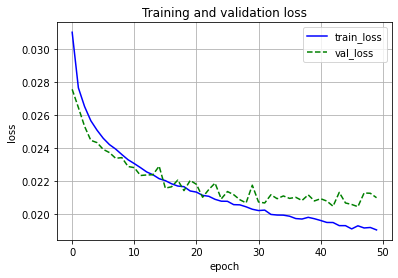

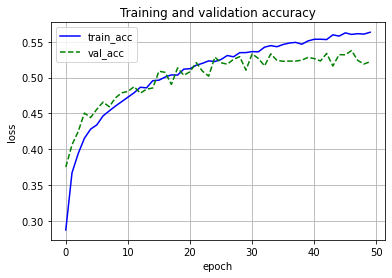

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(range(num_epochs), train_loss_list, color = 'blue', linestyle = '-', label = 'train_loss')
plt.plot(range(num_epochs), val_loss_list, color = 'green', linestyle = '--', label = 'val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, color = 'blue', linestyle = '-', label = 'train_acc')
plt.plot(range(num_epochs), val_acc_list, color = 'green', linestyle = '--', label = 'val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation accuracy')
plt.grid()


In [54]:
torch.save(net.state_dict(), '../net.ckpt')

In [55]:
net2 = MLPNet().to(device)
net2.load_state_dict(torch.load('../net.ckpt'))

<All keys matched successfully>

In [56]:
net2.eval()
with torch.no_grad():
    total = 0
    test_acc =0
    for images, labels in test_loader:
        images, labels = images.view(-1, 32*32*3).to(device), labels.to(device)
        outputs = net2(images)
        test_acc += (outputs.max(1)[1] == labels).sum().item()
        total +=labels.size(0)
    print("accuracy: {}".format(100*test_acc/total))

accuracy: 52.21
